# Complete Analysis Organized According to the Workflow of a Data Scientist
Below is a complete analysis structured as per the workflow provided. The steps include importing, tidying, transforming, visualizing, modeling, and communication.

In [12]:
# Load necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

Markdown style:
<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">

</div>


## Step 1. Importing and Exploring Data
- Import the dataset into Python as `car`
- Explore the dataset information and types

In [13]:

url = 'https://raw.githubusercontent.com/sijiao-liu/customer-car-prediction/main/data/car_sales.csv'

car = pd.read_csv(url)

car.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [14]:
# Get the data information
print("Dataset Info.:")
car.info()

Dataset Info.:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


## Step 2. Tidying Data
1. Check for `missing values` and `duplicate rows`
2. Convert `Date` column to datetime format
3. Standardize relevant and necessary categorical variables' formatting
4. Drop irrelevant and unnecessary columns (`Car_id`, `Customer Name`, `Dealer_Name`, `Engine`, `Dealer_No`). Notice that dropping `Engine` because it has an one-to-one relationship with `Transmission`
5. Extract `Year` and `Month` from the `Date` column.


In [15]:
# 2.1.1 Check for missing values
missing_values = car.isnull().sum()

# 2.1.2 Check for duplicate rows
duplicates_count = car.duplicated().sum()

# 2.2 Convert Date column to datetime format
car['Date'] = pd.to_datetime(car['Date'], errors='coerce')

# Summary of cleaned data
cleaning_summary = {
    "Missing Values": missing_values.sum(),
    "Duplicate Rows": duplicates_count,
    "Date Conversion Issues": car['Date'].isnull().sum()
}

cleaning_summary

{'Missing Values': 1, 'Duplicate Rows': 0, 'Date Conversion Issues': 0}

In [17]:
# Filter columns with missing values
columns_with_missing = missing_values[missing_values > 0]

# Print the result
print("Columns with missing values and their counts:")
print(columns_with_missing)

Columns with missing values and their counts:
Customer Name    1
dtype: int64


<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">

The dataset contains only one missing values under Customer Name, which won't affect our analysis as Customer Name isn't necessary for us.

</div>


In [18]:
# List of relevant and necessary categorical variables to standardize
categorical_variables = ['Gender', 'Company', 'Model', 'Transmission', 'Color', 'Body Style', 'Dealer_Region']

# 2.3 Standardizing formatting
for column in categorical_variables:
    car[column] = car[column].str.capitalize()

In [26]:
# 2.4 Drop irrelevant and unnecessary columns
columns_to_drop = ['Car_id', 'Customer Name', 'Dealer_Name', 'Engine', 'Dealer_No ', 'Phone']
car_cleaned = car.drop(columns=columns_to_drop, errors='ignore')  # `errors='ignore'` skips columns that don't exist

# 2.5 Extract 'Year' and 'Month' from `Date` column
car_cleaned['Year'] = car_cleaned['Date'].dt.year
car_cleaned['Month'] = car_cleaned['Date'].dt.month

## Change 'Year' and 'Month' to category datatype
car_cleaned['Year'] = car_cleaned['Year'].astype('object')
car_cleaned['Month'] = car_cleaned['Month'].astype('object')

car_cleaned.head()

,Date,Gender,Annual Income,Company,Model,Transmission,Color,Price ($),Body Style,Dealer_Region,Year,Month
0,2022-01-02,Male,13500,Ford,Expedition,Auto,Black,26000,Suv,Middletown,2022,1
1,2022-01-02,Male,1480000,Dodge,Durango,Auto,Black,19000,Suv,Aurora,2022,1
2,2022-01-02,Male,1035000,Cadillac,Eldorado,Manual,Red,31500,Passenger,Greenville,2022,1
3,2022-01-02,Male,13500,Toyota,Celica,Manual,Pale white,14000,Suv,Pasco,2022,1
4,2022-01-02,Male,1465000,Acura,Tl,Auto,Red,24500,Hatchback,Janesville,2022,1


In [27]:
# Define the file path
clean_data_path = "../data/clean_car_sales.csv"

# Ensure the directory exists
os.makedirs(os.path.dirname(clean_data_path), exist_ok=True)

# Check if car_cleaned is a Pandas DataFrame
if isinstance(car_cleaned, pd.DataFrame):
    print("car_cleaned is already a Pandas DataFrame.")
else:
    print("car_cleaned is not a Pandas DataFrame. Converting it to one...")
    car_cleaned = pd.DataFrame(car_cleaned)

# Save to CSV
car_cleaned.to_csv(clean_data_path, index=False, encoding='utf-8')

car_cleaned is already a Pandas DataFrame.


## Step 3. Transforming Data
Focus on relevant variables and calculate summary statistics:
1. Apply initial data exploration
    - Data information
    - Basic statistics and distribution of numberica variables
    - Distribution of the categorical variables: counts of unique values

In [ ]:
# 3.1.1 Get the data information
print("Dataset Info.:")
car_cleaned.info()

Dataset Info.:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           23906 non-null  datetime64[ns]
 1   Gender         23906 non-null  object        
 2   Annual Income  23906 non-null  int64         
 3   Company        23906 non-null  object        
 4   Model          23906 non-null  object        
 5   Transmission   23906 non-null  object        
 6   Color          23906 non-null  object        
 7   Price ($)      23906 non-null  int64         
 8   Body Style     23906 non-null  object        
 9   Dealer_Region  23906 non-null  object        
 10  Year           23906 non-null  object        
 11  Month          23906 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 2.2+ MB


In [ ]:
# 3.1.2 Get the basic statistics and distribution of numerical variables
print("Numerical Features Statistics:")
car_cleaned.describe()

Numerical Features Statistics:


,Date,Annual Income,Price ($)
count,23906,2.390600e+04,23906.000000
mean,2023-03-01 14:28:10.822387456,8.308403e+05,28090.247846
min,2022-01-02 00:00:00,1.008000e+04,1200.000000
25%,2022-09-20 00:00:00,3.860000e+05,18001.000000
50%,2023-03-13 00:00:00,7.350000e+05,23000.000000
75%,2023-09-08 00:00:00,1.175750e+06,34000.000000
max,2023-12-31 00:00:00,1.120000e+07,85800.000000
std,NaN,7.200064e+05,14788.687608


In [ ]:
# List of relevant and necessary categorical variables to standardize
categorical_variables_cleaned = ['Gender', 'Company', 'Model', 'Transmission', 'Color', 'Body Style', 'Dealer_Region', 'Year', 'Month']

# 3.1.3 Iterate through the categorical variables and display value counts (distribution)
print("Categorical Variables Unique Values:")
for variable in categorical_variables_cleaned:
    #print(f"\n{variable}")
    print(car_cleaned[variable].value_counts())
    print()  # Add an empty line after each variable's output

Categorical Variables Unique Values:
Gender
Male      18798
Female     5108
Name: count, dtype: int64

Company
Chevrolet     1819
Dodge         1671
Ford          1614
Volkswagen    1333
Mercedes-b    1285
Mitsubishi    1277
Chrysler      1120
Oldsmobile    1111
Toyota        1110
Nissan         886
Mercury        874
Lexus          802
Pontiac        796
Bmw            790
Volvo          789
Honda          708
Acura          689
Cadillac       652
Plymouth       617
Saturn         586
Lincoln        492
Audi           468
Buick          439
Subaru         405
Jeep           363
Porsche        361
Hyundai        264
Saab           210
Infiniti       195
Jaguar         180
Name: count, dtype: int64

Model
Diamante         418
Silhouette       411
Prizm            411
Passat           391
Ram pickup       383
                ... 
Mirage            19
Alero             18
Rx300             15
Avalon            15
Sebring conv.     10
Name: count, Length: 154, dtype: int64

Transmission
Au

## Step 4. Data Visualization
Visualize demographic insights, sales performance, and other key patterns.

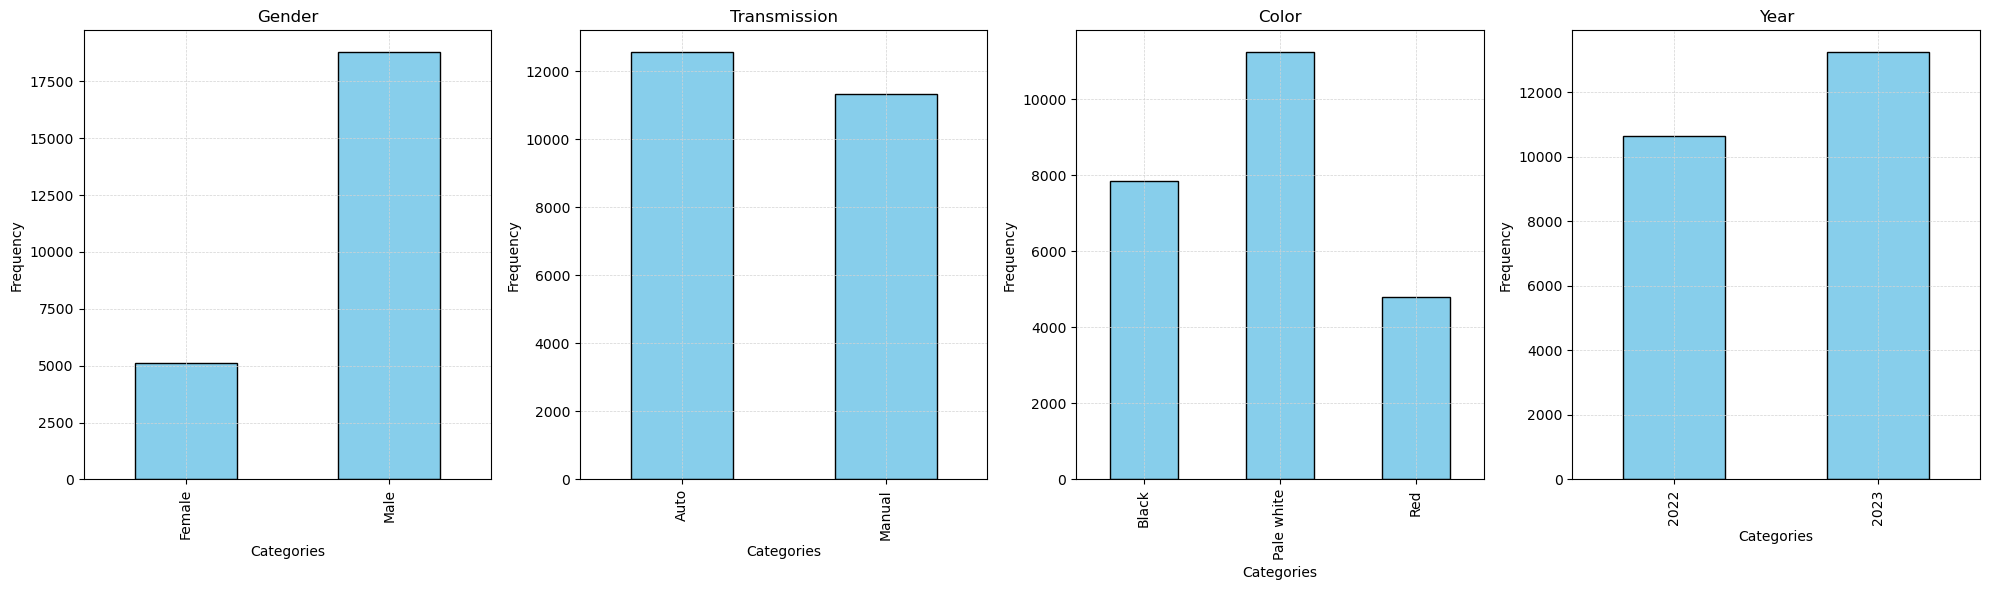

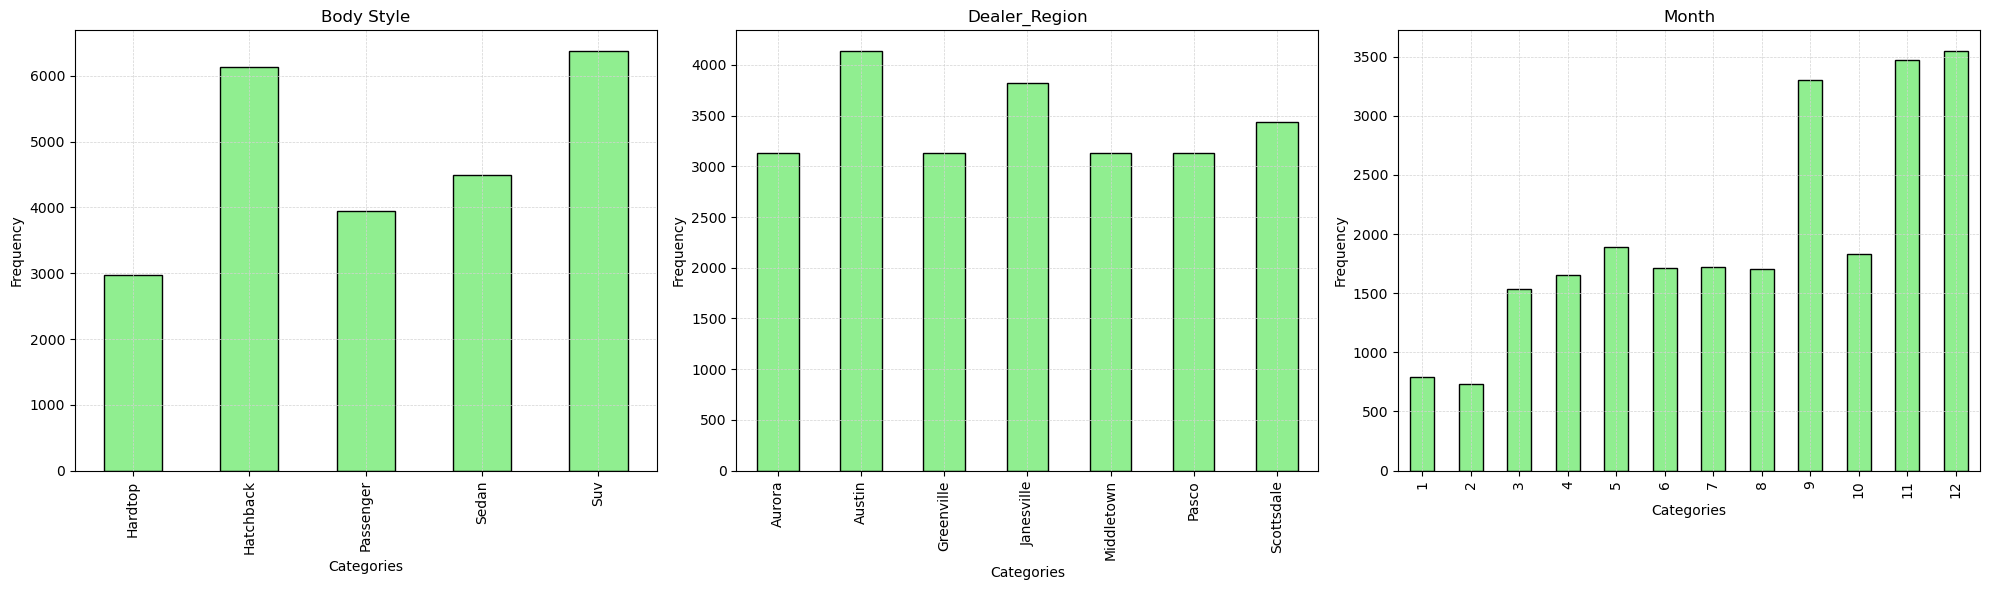

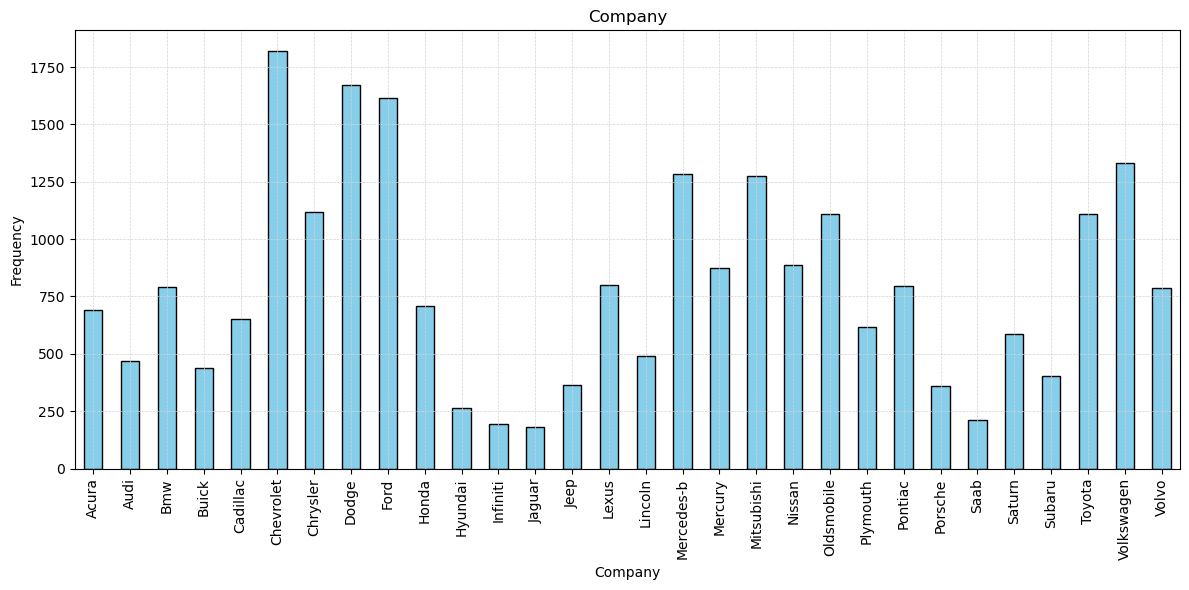

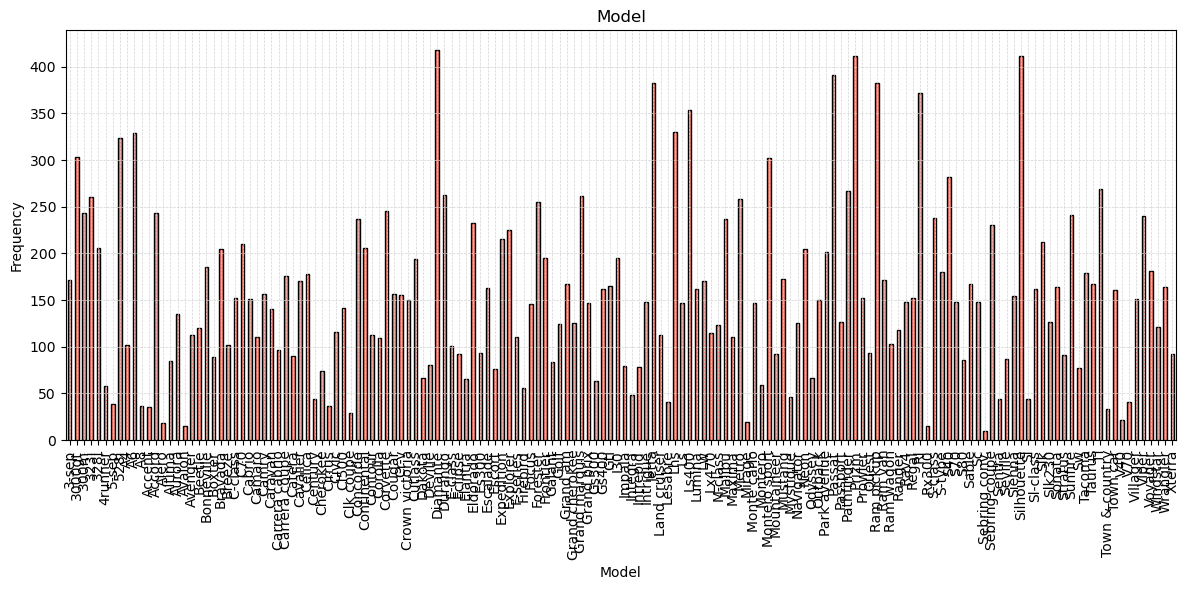

In [ ]:
# 4.1 Let's retry creating histograms for all categorical variables in a structured format - x-axis is sorted A-Z.

# Define subgroups for plotting
subgroup1 = ['Gender', 'Transmission', 'Color', 'Year']
subgroup2 = ['Body Style', 'Dealer_Region', 'Month']

# Create histograms for subgroup1 with sorted x-axis
fig, axes = plt.subplots(1, len(subgroup1), figsize=(20, 6))
for i, var in enumerate(subgroup1):
    sorted_counts = car_cleaned[var].value_counts().sort_index()
    sorted_counts.plot(
        kind='bar',
        ax=axes[i],
        title=var,
        color='skyblue',
        edgecolor='black'
    )
    axes[i].set_xlabel("Categories")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Create histograms for subgroup2 with sorted x-axis
fig, axes = plt.subplots(1, len(subgroup2), figsize=(20, 6))
for i, var in enumerate(subgroup2):
    sorted_counts = car_cleaned[var].value_counts().sort_index()
    sorted_counts.plot(
        kind='bar',
        ax=axes[i],
        title=var,
        color='lightgreen',
        edgecolor='black'
    )
    axes[i].set_xlabel("Categories")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot histogram for 'Company' with sorted x-axis
fig, ax = plt.subplots(figsize=(12, 6))
sorted_counts = car_cleaned['Company'].value_counts().sort_index()
sorted_counts.plot(
    kind='bar',
    ax=ax,
    title='Company',
    color='skyblue',
    edgecolor='black'
)
ax.set_xlabel("Company")
ax.set_ylabel("Frequency")
ax.grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot histogram for 'Model' with sorted x-axis
fig, ax = plt.subplots(figsize=(12, 6))
sorted_counts = car_cleaned['Model'].value_counts().sort_index()
sorted_counts.plot(
    kind='bar',
    ax=ax,
    title='Model',
    color='salmon',
    edgecolor='black'
)
ax.set_xlabel("Model")
ax.set_ylabel("Frequency")
ax.grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

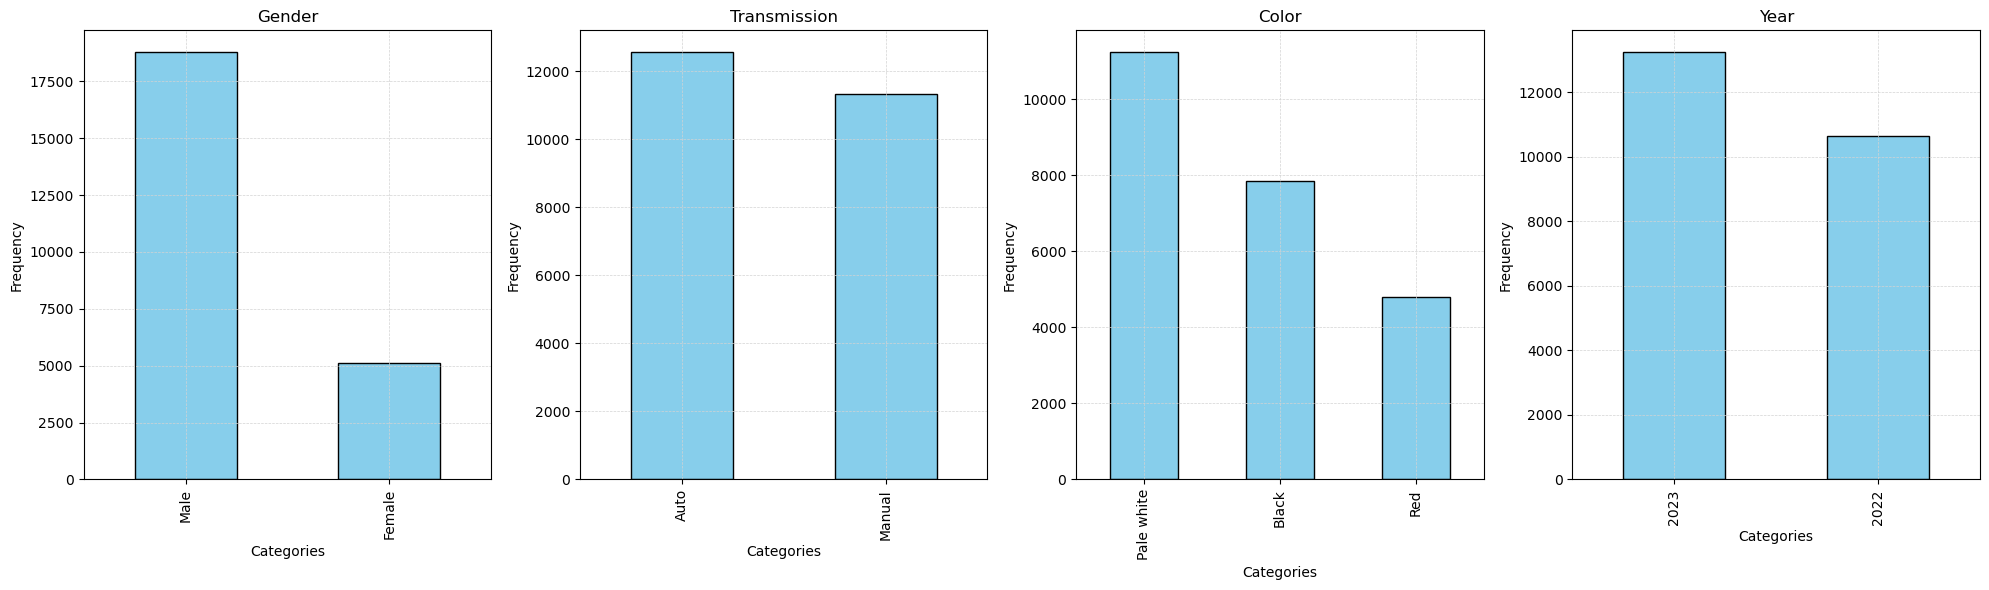

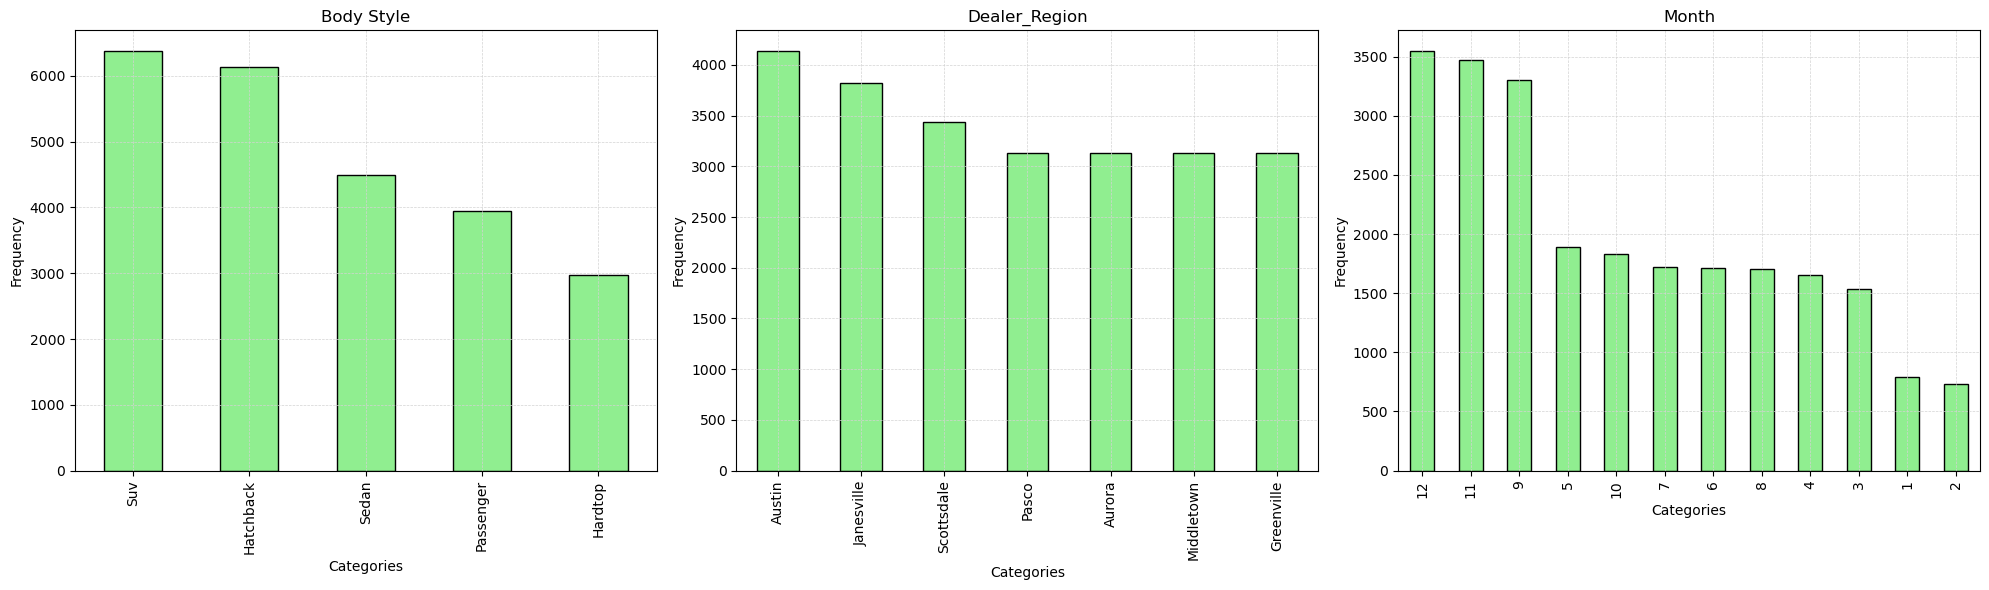

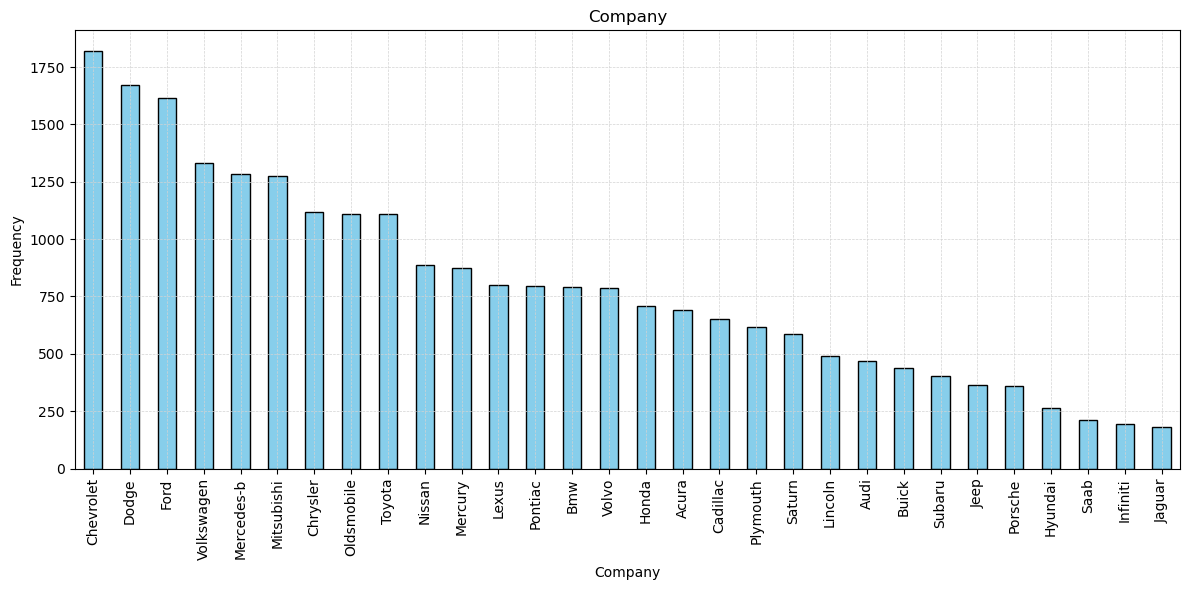

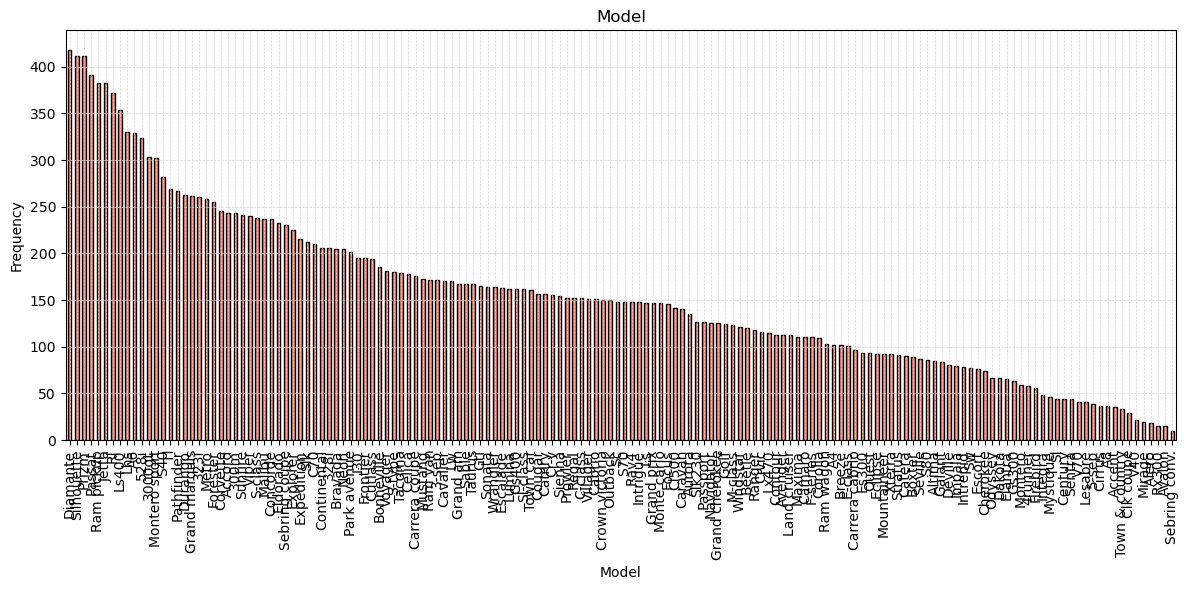

In [ ]:
# 4.1 Let's retry creating histograms for all categorical variables in a structured format.

# Define subgroups for plotting
subgroup1 = ['Gender', 'Transmission', 'Color', 'Year']
subgroup2 = ['Body Style', 'Dealer_Region', 'Month']

# Create histograms for subgroup1
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
for i, var in enumerate(subgroup1):
    car_cleaned[var].value_counts().plot(
        kind='bar',
        ax=axes[i],
        title=var,
        color='skyblue',
        edgecolor='black'
    )
    axes[i].set_xlabel("Categories")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Create histograms for subgroup2
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, var in enumerate(subgroup2):
    car_cleaned[var].value_counts().plot(
        kind='bar',
        ax=axes[i],
        title=var,
        color='lightgreen',
        edgecolor='black'
    )
    axes[i].set_xlabel("Categories")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot histogram for 'Company'
fig, ax = plt.subplots(figsize=(12, 6))
car_cleaned['Company'].value_counts().plot(
    kind='bar',
    ax=ax,
    title='Company',
    color='skyblue',
    edgecolor='black'
)
ax.set_xlabel("Company")
ax.set_ylabel("Frequency")
ax.grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot histogram for 'Model'
fig, ax = plt.subplots(figsize=(12, 6))
car_cleaned['Model'].value_counts().plot(
    kind='bar',
    ax=ax,
    title='Model',
    color='salmon',
    edgecolor='black'
)
ax.set_xlabel("Model")
ax.set_ylabel("Frequency")
ax.grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Gender distribution
gender_counts = car_cleaned['Gender'].value_counts()

# Average price by body style
avg_price_by_body_style = car_cleaned.groupby('Body Style')['Price ($)'].mean()

# Regional sales distribution
region_counts = car_cleaned['Dealer_Region'].value_counts()
